In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


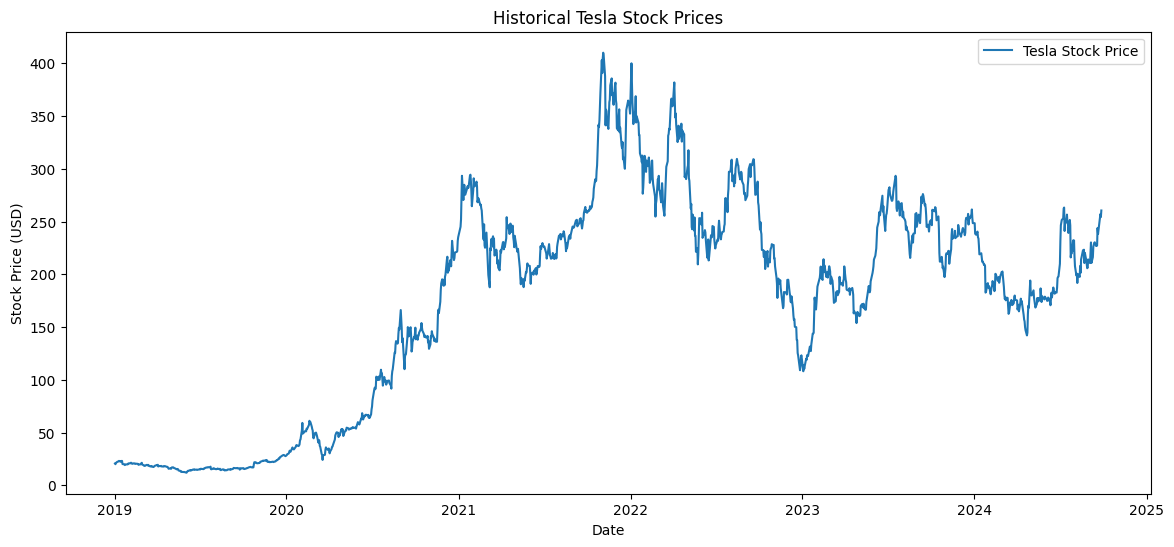

Mean Stock Price: 174.56
Variance of Stock Price: 10403.41


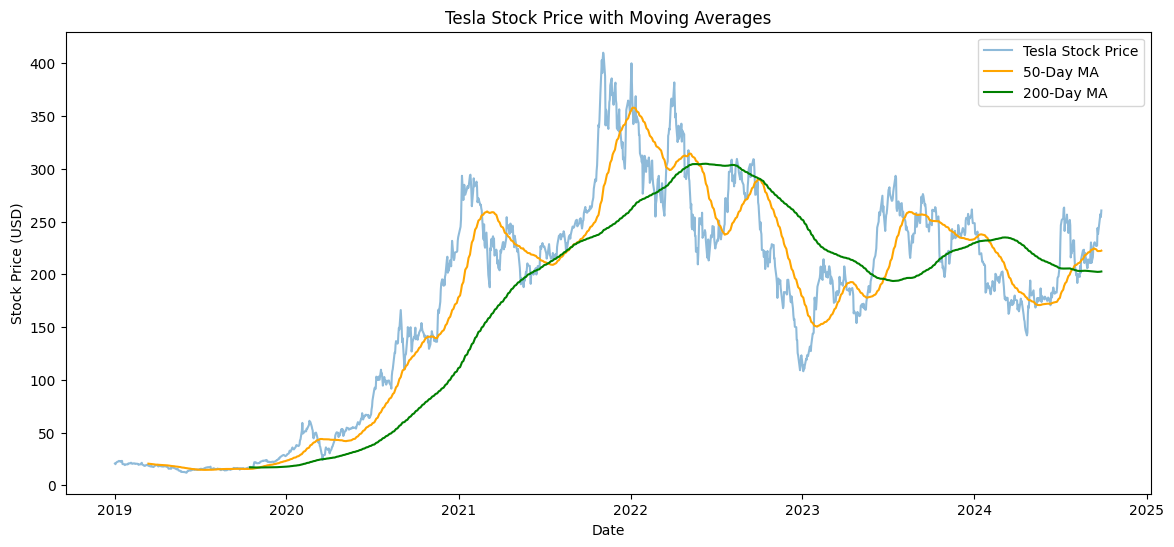


Correlation Matrix:
                       Close  Daily Revenue  Close_sp500  Daily Tesla Sales
Close              1.000000       0.674311     0.749510           0.351684
Daily Revenue      0.674311       1.000000     0.822334           0.565307
Close_sp500        0.749510       0.822334     1.000000           0.421995
Daily Tesla Sales  0.351684       0.565307     0.421995           1.000000


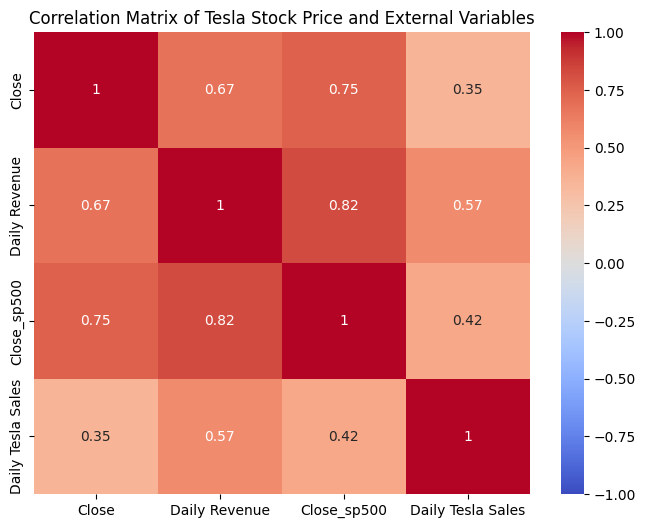

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the datasets
# Replace 'file_path' with the path or DataFrame variables for your datasets
tesla_close = pd.read_csv('Tesla_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')
daily_revenue = pd.read_csv('Daily_Revenue_2019_2024.csv', parse_dates=['Date'], index_col='Date')
sp500 = pd.read_csv('S&P500_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')
daily_sales = pd.read_csv('Daily_Tesla_Sales_with_Smoothed_Values.csv', parse_dates=['Date'], index_col='Date')

# Merge the datasets on 'Date' with suffixes to avoid conflicts
merged_data = tesla_close.merge(daily_revenue, left_index=True, right_index=True, how='inner', suffixes=('', '_revenue'))
merged_data = merged_data.merge(sp500, left_index=True, right_index=True, how='inner', suffixes=('', '_sp500'))
merged_data = merged_data.merge(daily_sales, left_index=True, right_index=True, how='inner', suffixes=('', '_sales'))

# Step 2: Plot Tesla stock prices
plt.figure(figsize=(14, 6))
plt.plot(merged_data.index, merged_data['Close'], label='Tesla Stock Price')
plt.title('Historical Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Step 3: Calculate key statistics
mean_price = merged_data['Close'].mean()
variance_price = merged_data['Close'].var()
print(f"Mean Stock Price: {mean_price:.2f}")
print(f"Variance of Stock Price: {variance_price:.2f}")

# Calculate moving averages
merged_data['50_MA'] = merged_data['Close'].rolling(window=50).mean()
merged_data['200_MA'] = merged_data['Close'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(14, 6))
plt.plot(merged_data.index, merged_data['Close'], label='Tesla Stock Price', alpha=0.5)
plt.plot(merged_data.index, merged_data['50_MA'], label='50-Day MA', color='orange')
plt.plot(merged_data.index, merged_data['200_MA'], label='200-Day MA', color='green')
plt.title('Tesla Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Step 4: Check for correlations
correlation_matrix = merged_data[['Close', 'Daily Revenue', 'Close_sp500','Daily Tesla Sales']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Tesla Stock Price and External Variables')
plt.show()
